Diabetes Prediction Using Ensemble Models

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data Exploration

In [ ]:
df.shape

(768, 9)

In [ ]:
print('Total number of Records: ' , len(df) )

Total number of Records:  768


In [ ]:
print('Parameters are: ' , df.columns )

Parameters are:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

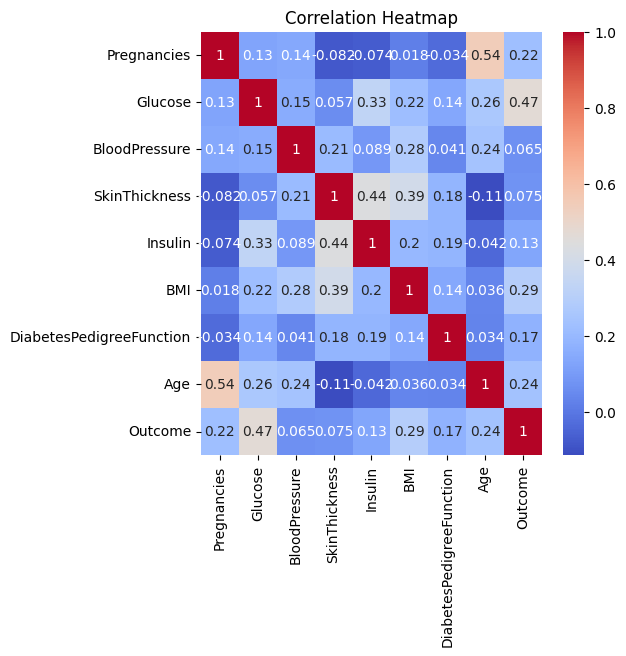

In [ ]:
plt.figure(figsize=(5.5,5.5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.isnull().sum() #The output shows that there are no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
truecount = len(df.loc[df['Outcome']==True])
print(truecount)

268


In [ ]:
falsecount = len(df.loc[df['Outcome']==False])
print(falsecount)

500


In [ ]:
correlation_matrix['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

Data Splitting

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Pregnancies' , 'Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']]
y = df['Outcome']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.3 , random_state= 0 )

Model Selection and Model Training

In [ ]:
#Selecting the right algorithm according to our requirement and then we will train data on model
n_estimators = 10
base_models = []
base_models_adaboost = []
base_models_gradientboost = []
base_models_bagging = []
base_models_extratrees = []
base_models_xgboost = []

In [ ]:
#Random Forest
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(x_train, y_train)
    base_models.append(rf)

In [ ]:
#Create and train AdaBoost Models
for i in range(n_estimators):
    ab = AdaBoostClassifier(n_estimators=100)
    ab.fit(x_train, y_train)
    base_models_adaboost.append(ab)


In [ ]:
# Create and train Gradient Boosting models
for i in range(n_estimators):
    gb = GradientBoostingClassifier(n_estimators=100)
    gb.fit(x_train, y_train)
    base_models_gradientboost.append(gb)

In [ ]:
# Create and train Bagging models
for i in range(n_estimators):
    bagging = BaggingClassifier(n_estimators=100)
    bagging.fit(x_train, y_train)
    base_models_bagging.append(bagging)

In [ ]:
# Create and train Extra Trees models
for i in range(n_estimators):
    extra_trees = ExtraTreesClassifier(n_estimators=100)
    extra_trees.fit(x_train, y_train)
    base_models_extratrees.append(extra_trees)

In [ ]:
# Create and train XGBoost models
for i in range(n_estimators):
    xgboost = XGBClassifier(n_estimators=100)
    xgboost.fit(x_train, y_train)
    base_models_xgboost.append(xgboost)

In [ ]:
# Create and train Voting Classifier models
voting_classifier = VotingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_adaboost[0]),
    ('gb', base_models_gradientboost[0]),
], voting='soft')
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('ab', AdaBoostClassifier(n_estimators=100)),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [ ]:
# Create and train Stacking Classifier models
stacking_classifier = StackingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_adaboost[0]),
    ('gb', base_models_gradientboost[0]),
], final_estimator=LogisticRegression())
stacking_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('ab', AdaBoostClassifier(n_estimators=100)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
#CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of boosting iterations (adjust as needed)
                                    learning_rate=0.1,  # Learning rate (adjust as needed)
                                    depth=6,  # Depth of the trees (adjust as needed)
                                    random_state=42)  # Random seed for reproducibility

catboost_model.fit(x_train, y_train)

0:	learn: 0.6696660	total: 53.9ms	remaining: 5.34s
1:	learn: 0.6439327	total: 56.4ms	remaining: 2.76s
2:	learn: 0.6231656	total: 59.7ms	remaining: 1.93s
3:	learn: 0.6046479	total: 62.7ms	remaining: 1.5s
4:	learn: 0.5880920	total: 65.9ms	remaining: 1.25s
5:	learn: 0.5754677	total: 68.8ms	remaining: 1.08s
6:	learn: 0.5629351	total: 71.9ms	remaining: 955ms
7:	learn: 0.5523935	total: 74.7ms	remaining: 859ms
8:	learn: 0.5415695	total: 78.7ms	remaining: 796ms
9:	learn: 0.5319848	total: 81.2ms	remaining: 730ms
10:	learn: 0.5223657	total: 84.5ms	remaining: 684ms
11:	learn: 0.5126379	total: 87.7ms	remaining: 643ms
12:	learn: 0.5042433	total: 91ms	remaining: 609ms
13:	learn: 0.4969392	total: 94.3ms	remaining: 580ms
14:	learn: 0.4894147	total: 97.6ms	remaining: 553ms
15:	learn: 0.4833023	total: 101ms	remaining: 529ms
16:	learn: 0.4781299	total: 104ms	remaining: 508ms
17:	learn: 0.4723399	total: 108ms	remaining: 491ms
18:	learn: 0.4673457	total: 110ms	remaining: 470ms
19:	learn: 0.4614204	total: 1

In [ ]:
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)
pa_classifier.fit(x_train, y_train)

PassiveAggressiveClassifier(random_state=42)

Model Evaluation or Testing

In [ ]:

predictions = [model.predict(x_test) for model in base_models]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Random Forest: {ensemble_accuracy}")

predictions = [model.predict(x_test) for model in base_models_adaboost]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for AdaBoost: {ensemble_accuracy}")

predictions = [model.predict(x_test) for model in base_models_gradientboost]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Gradient Boosting: {ensemble_accuracy}")

predictions = [model.predict(x_test) for model in base_models_bagging]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Bagging: {ensemble_accuracy}")

predictions = [model.predict(x_test) for model in base_models_extratrees]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for Extre Trees: {ensemble_accuracy}")

predictions = [model.predict(x_test) for model in base_models_xgboost]
ensemble_predictions = np.round(np.mean(predictions, axis=0))
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy for XG Boost: {ensemble_accuracy}")

predictions = voting_classifier.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Accuracy for Voting: {ensemble_accuracy}")

predictions = stacking_classifier.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Accuracy for Stacking: {ensemble_accuracy}")

predictions = catboost_model.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Accuracy for Cat Boost Model: {ensemble_accuracy}")

predictions = pa_classifier.predict(x_test)
ensemble_accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Accuracy for Passive Aggressive: {ensemble_accuracy}")

Ensemble Accuracy for Random Forest: 0.7835497835497836
Ensemble Accuracy for AdaBoost: 0.7532467532467533
Ensemble Accuracy for Gradient Boosting: 0.7835497835497836
Ensemble Accuracy for Bagging: 0.7922077922077922
Ensemble Accuracy for Extre Trees: 0.7748917748917749
Ensemble Accuracy for XG Boost: 0.7748917748917749
Ensemble Accuracy for Voting: 0.7792207792207793
Ensemble Accuracy for Stacking: 0.7792207792207793
Ensemble Accuracy for Cat Boost Model: 0.7705627705627706
Ensemble Accuracy for Passive Aggressive: 0.354978354978355


Getting Input from User

In [ ]:
userinput = {
    'Pregnancies': float(input('Enter number of Pregnancies: ')),
    'Glucose': float(input('Enter Glucose level: ')),
    'BloodPressure': float(input('Enter Blood Pressure: ')),
    'SkinThickness': float(input('Enter Skin Thickness: ')),
    'Insulin': float(input('Enter Insulin level: ')),
    'BMI': float(input('Enter BMI: ')),
    'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
    'Age': float(input('Enter Age: '))
}

user_df = pd.DataFrame([userinput])

# Convert the user input into a DataFrame
user_df = pd.DataFrame([userinput])

# Make a prediction using the trained model
user_prediction = rf.predict(user_df)

# Interpret the prediction
if user_prediction[0] == 0:
    result = "No Diabetes"
else:
    result = "Diabetes"

print(f"The model predicts: {result}")

Enter number of Pregnancies: 2
Enter Glucose level: 100
Enter Blood Pressure: 89
Enter Skin Thickness: 20
Enter Insulin level: 100
Enter BMI: 29
Enter Diabetes Pedigree Function: 15
Enter Age: 30
The model predicts: No Diabetes
